## Important

We might have to re-upload the training data everytime we restart the runtime: 
https://drive.google.com/file/d/1TIjLoiaIv2VTYNkt3Ohy1WiV9YVeiqZB/view?usp=sharing

Variables:
https://docs.google.com/document/d/1GDFAM2u0rhkBXFb-BNnpbCPFHlobWL00NwyEAgKL4hM/edit

## Required Dependencies

In [ ]:
!pip3 install scikit-learn
!pip3 install pandas
!pip install pandas_ml

## DataFrame Set Up 

In [ ]:
from dataclasses import dataclass
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas_ml as pdml
import seaborn as sns
from sklearn.model_selection import train_test_split

# CSV here
realEstateData_file = "/content/realEstateData.csv"
data = pd.read_csv(realEstateData_file, header=0)

# Only numeric columns.
# data = data._get_numeric_data()

df = pd.DataFrame(data=data)
# target = df["HOUSE VALUE"].values

# Show dataframe
# df.head()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Feature Correlation

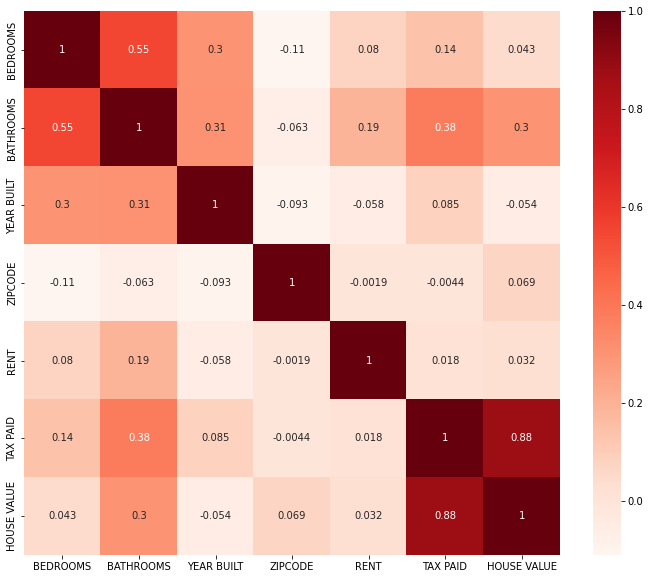

In [ ]:
# Switched to ModelFrame due version dependency issues,
# could not set target using DataFrame.
mf = pdml.ModelFrame(data=data, target='HOUSE VALUE')

# I don't know exactly why I need this yet.
x = mf.drop("HOUSE VALUE", 1)
y = mf["HOUSE VALUE"]

# Analyzing correlation, beginning feature engineering.
plt.figure(figsize=(12, 10))
cor = mf.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#Testing diff here

## Relevant Features

In [ ]:
cor_target = abs(cor["HOUSE VALUE"])

# Target values > 0.5 resulted in 1 feature only.
relevant_features = cor_target[cor_target>0.06]
relevant_features

print(mf[["TAX PAID", "ZIPCODE"]].corr())
print(mf[["BATHROOMS", "TAX PAID"]].corr())

          TAX PAID   ZIPCODE
TAX PAID  1.000000 -0.004378
ZIPCODE  -0.004378  1.000000
           BATHROOMS  TAX PAID
BATHROOMS   1.000000  0.384099
TAX PAID    0.384099  1.000000


Relevant features:

```
BATHROOMS      0.302678
ZIPCODE        0.068984
TAX PAID       0.876227
HOUSE VALUE    1.000000
Name: HOUSE VALUE, dtype: float64
```

After comparison:
```
          TAX PAID   ZIPCODE
TAX PAID  1.000000 -0.004378
ZIPCODE  -0.004378  1.000000
           BATHROOMS  TAX PAID
BATHROOMS   1.000000  0.384099
TAX PAID    0.384099  1.000000
```

One of the assumptions of linear regression is that the independent variables need to be uncorrelated with each other. https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

## Nominal Value Conversion

In [ ]:
# Tax paid seems to have a stronger positive correlation to home value.
# mf.info() <--- This code seems buggy
# No missing data at this point.

df = df.sample(axis=0, frac=1)
df.head()

# How do I set axis? Getting an exeption.
# df = df.drop(labels=["TAX PAID"], axis='1')

,BEDROOMS,BATHROOMS,YEAR BUILT,CITY,ZIPCODE,STREET ADDRESS,RENT,PROPERTY TYPE,TAX PAID,HOUSE VALUE
911,3,2.0,50,34,95,485,124,2,1056,99200
3815,3,2.0,26,27,57,450,106,2,730,71000
3538,1,1.0,44,26,54,499,16,0,1950,124307
4555,4,2.0,52,0,16,577,88,2,4065,328142
323,3,2.0,65,39,22,399,66,2,180,135098


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Converting categorical values.
le = LabelEncoder()
df["CITY"] = le.fit_transform(df["CITY"])
df["STREET ADDRESS"] = le.fit_transform(df["STREET ADDRESS"])
df["PROPERTY TYPE"] = le.fit_transform(df["PROPERTY TYPE"])
df["YEAR BUILT"] = le.fit_transform(df["YEAR BUILT"])
df["ZIPCODE"] = le.fit_transform(df["ZIPCODE"])
df["RENT"] = le.fit_transform(df["RENT"])
df["TAX PAID"] = le.fit_transform(df["TAX PAID"])
df.head()

,BEDROOMS,BATHROOMS,YEAR BUILT,CITY,ZIPCODE,STREET ADDRESS,RENT,PROPERTY TYPE,TAX PAID,HOUSE VALUE
0,6,3.0,66,42,5,289,37,2,3274,166140
1,6,3.0,66,42,5,289,37,2,3205,162410
2,6,3.0,66,42,5,289,37,2,3205,159386
3,6,3.0,66,42,5,289,37,2,3161,159386
4,6,3.0,66,42,5,289,37,2,3144,152897


## Regression Model

In [ ]:
# Apply Regression Model

y_data = df.iloc[:,-1].values

#df.drop(labels=['HOUSE VALUE'], axis = 1)

x_data = df.iloc[:,0:9].values

## Training Data Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

## Model Fitting

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

## Prediction

In [ ]:
#  Predict  
y_predicted = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


## Accuracy

In [ ]:
# Accuracy

from sklearn.metrics import r2_score
r2_score(y_test, y_predicted)*100

79.45303023899234